# King County Housing Linear Regression Project


* Student name: Seyma Tas
* Student pace:  Full time
* Scheduled project review date/time: 05-04-2020
* Instructor name: Amber Yandow
* Blog post URL:


## OSEMN Approach
1 - Obtaining the data 2 - Scrubbing the data 3 - Exploring the data 4 - Modeling the data 5 - iNterpreting the results

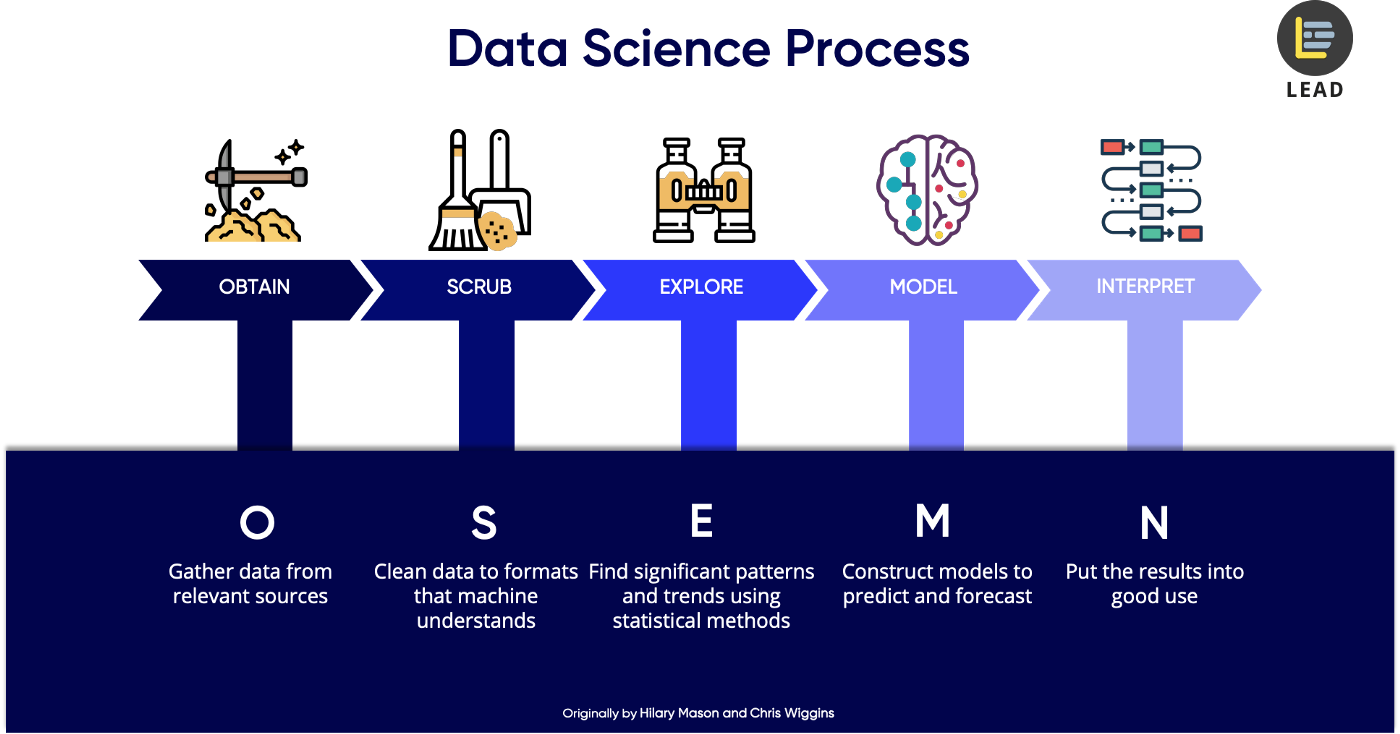





## Questions:

1) What are the key factors to predict the price of a house? (For real estate agents)

2) What is the most important factor determining the value of a house?(For home buyers)

3) How can a house's value be increased?(For home sellers)
    

In [1]:
%autosave 10

Autosaving every 10 seconds


The following cell is to print all the interactive output without resorting to print. 

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Import the necessary packages

First, we’ll import all of our necessary packages.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib
import seaborn as sns

from scipy import stats
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

sns.set(style='darkgrid')

Using matplotlib backend: MacOSX


Pandas has an options system that lets you customize some aspects of its behaviour, display-related options being those the user is most likely to adjust. In the following cell we are setting options to display more raws and columns.

In [4]:
# ## Display more information 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

The following code is to hide the warning boxes.

In [5]:
import warnings
warnings.filterwarnings('ignore')

## Import the data set

Next, we’ll import our data and see what we’re working with. 

In [6]:
df=pd.read_csv('kc_house_data.csv')

Lets see what the data looks like by functions head(), tail(), shape(), info() and describe().

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Information about the data

### Column names and descriptions



* **id** - unique identified for a house
* **date** - Date house was sold
* **price** - Price is prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number of bathrooms/bedrooms
* **sqft_living** - Square footage of the home
* **sqft_lot** - Square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - If the house has a view or not
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zipcode of the house
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


### Condition



More detailed information about condition from the [King County's website](https://blue.kingcounty.com/Assessor/eRealProperty/ResidentialGlossary.aspx?idx=viewall&Parcel=7960900070&AreaReport=http://www.KingCounty.gov/depts/Assessor/Reports/area-reports/2019/residential-northeast/033.aspx#BuildingGrade).

(Relative to age and grade. Coded 1-5.)

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.




### Building Grade



More detailed information about grade from the [King County's website](https://blue.kingcounty.com/Assessor/eRealProperty/ResidentialGlossary.aspx?idx=viewall&Parcel=7960900070&AreaReport=http://www.KingCounty.gov/depts/Assessor/Reports/area-reports/2019/residential-northeast/033.aspx#BuildingGrade).

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3	= Falls short of minimum building standards. Normally cabin or inferior structure

4	= Generally older, low quality construction. Does not meet code.

5	= Low construction costs and workmanship. Small, simple design.

6	= Lowest grade currently meeting building code. Low quality materials and simple designs.

7	= Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8	= Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9	= Better architectural design with extra interior and exterior design and quality.

10	= Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11	= Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12	= Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13	= Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.


### Drop unnecessary columns

Id column doesn't tell us anything so we drop this column. 
Date column tells us the date the house was sold. All the dates are between 2014-05-02 and 2015-05-27. So we don't need to calculate inflation. But the sale month tells us information about sale price. May must be the month many houses are sold and the prices must be higher in May. Lets take the month and drop the date.

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['date'].min()

Timestamp('2014-05-02 00:00:00')

In [10]:
df['date'].max()

Timestamp('2015-05-27 00:00:00')

In [11]:
df['sale_month'] = df['date'].map(lambda x: x.month)

In [12]:
df=df.drop(['id','date'],axis=1)

# Scraping and cleaning data

In [13]:
df.shape

(21597, 20)

We have 20 columns and 21597 rows,our sample size is enough to predict the price. There won't be problems in test and train splits. 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
sale_month       21597 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 3.3+ MB


According to the information of data; we have some missing values in waterfront, view and year_renovated columns. We need to deal with missing data. Data is clean. It is necessary to inspect sqft_basement column. It should be an integer not a string.

## Numerical Data Stored as Strings

In [15]:
df.sqft_basement.value_counts()

0.0       12826
?         454  
600.0     217  
500.0     209  
700.0     208  
800.0     201  
400.0     184  
1000.0    148  
300.0     142  
900.0     142  
200.0     105  
750.0     104  
450.0     103  
530.0     103  
480.0     103  
720.0     98   
620.0     90   
580.0     84   
840.0     83   
420.0     81   
860.0     79   
1100.0    78   
670.0     78   
550.0     76   
780.0     76   
650.0     75   
240.0     74   
380.0     73   
680.0     73   
360.0     72   
850.0     72   
770.0     71   
910.0     71   
940.0     71   
1200.0    69   
880.0     69   
440.0     69   
290.0     69   
520.0     68   
350.0     68   
920.0     66   
630.0     66   
730.0     65   
960.0     65   
740.0     64   
430.0     64   
640.0     63   
760.0     63   
1010.0    63   
950.0     62   
340.0     62   
820.0     62   
280.0     62   
570.0     62   
560.0     62   
460.0     61   
790.0     61   
310.0     58   
1060.0    58   
980.0     57   
830.0     56   
1040.0    55   
540.0   

sqft_basement column is string because of 454 '?'. First we replace '?' with '0'. Then we change the data type to float and we find the 'sqft_basement' column from 'sqft_living' and 'sqft_above' columns.

In [16]:
# Replace '?' with '0'.
df['sqft_basement']=df['sqft_basement'].map(lambda x:float(x.replace('?', '0')))


In [17]:
#Replace 0 with difference between sqft_above and sqft_living
df['sqft_basement'].replace(to_replace='0', value = abs(df['sqft_living']-df['sqft_above']), inplace=True)


There is a house with 33 bedrooms. But its price is $640,000. Number of bathrooms is 1.75. It is a 3 bedroom house. 

In [18]:
df[df.bedrooms==33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_month
15856,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,6


In [19]:
# Change 33 bedrooms to 3 bedrooms.
df['bedrooms'].replace(to_replace=33, value =3, inplace=True)


In [20]:
df.describe().round(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_month
count,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,540296.6,3.4,2.1,2080.3,15099.4,1.5,0.0,0.2,3.4,7.7,1788.6,285.7,1971.0,83.6,98078.0,47.6,-122.2,1986.6,12758.3,6.6
std,367368.1,0.9,0.8,918.1,41412.6,0.5,0.1,0.8,0.7,1.2,827.8,439.8,29.4,399.9,53.5,0.1,0.1,685.2,27274.4,3.1
min,78000.0,1.0,0.5,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,0.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0,1.0
25%,322000.0,3.0,1.8,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.5,-122.3,1490.0,5100.0,4.0
50%,450000.0,3.0,2.2,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7620.0,6.0
75%,645000.0,4.0,2.5,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,550.0,1997.0,0.0,98118.0,47.7,-122.1,2360.0,10083.0,9.0
max,7700000.0,11.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.8,-121.3,6210.0,871200.0,12.0


Most houses were build around 1975; sold for $450K; had square footage of living spaces around 1910. You can also note, that distributions of price and variables such as sqft_lot are skewed to the upper tail.

## Detecting and Dealing With Null Values

In [21]:
print(df.isna().sum())

price            0   
bedrooms         0   
bathrooms        0   
sqft_living      0   
sqft_lot         0   
floors           0   
waterfront       2376
view             63  
condition        0   
grade            0   
sqft_above       0   
sqft_basement    0   
yr_built         0   
yr_renovated     3842
zipcode          0   
lat              0   
long             0   
sqft_living15    0   
sqft_lot15       0   
sale_month       0   
dtype: int64


We need to deal with missing values in waterfront, view and year_renovated columns.

#### Waterfront and view columns

In [22]:
df['view'].value_counts()

0.0    19422
2.0    957  
3.0    508  
1.0    330  
4.0    317  
Name: view, dtype: int64

Most of the houses don't have view. Houses in Seattle might have both ocean, lake and mountain views.

In [23]:
len(df[(df.view==4)&(df.waterfront>0)])

123

Almost %38 of the houses with good views are waterfront homes. The others must have Mount Rainier view or downtown view.

We are trying to decide what to do with missing values in waterfront column.

In [24]:
df['view'].isna().sum()

63

In [25]:
feats = ['view', 'waterfront']
df[feats].corr()

,view,waterfront
view,1.000000,0.406654
waterfront,0.406654,1.000000


In [26]:
print('Number missing both:',
      len(df[(df.view.isnull())
      & (df.waterfront.isnull())]))

Number missing both: 6


In [27]:
len(df[(df.view==0)&(df.waterfront>0)])

0

In [28]:
len(df[(df.view==2)&(df.waterfront.isna())])

121

In [29]:
len(df[(df.view==3)&(df.waterfront>0)])

14

Waterfront and view columns are corrolated. If there was a view or waterfront is would going to be written. We can say missinf values in waterfront column can be filled with '0'.

In [30]:
df['view'].fillna(0,inplace=True)

In [31]:
df['waterfront'].value_counts()

0.0    19075
1.0    146  
Name: waterfront, dtype: int64

In [32]:
df['waterfront'].nunique()

2

In [33]:
df['waterfront'].isna().sum()

2376

In [34]:
df['waterfront'].fillna(0,inplace=True)

In [35]:
feats = ['view', 'waterfront']
df[feats].corr()

,view,waterfront
view,1.000000,0.380543
waterfront,0.380543,1.000000


#### Year_renovated column

In [36]:
df.yr_renovated.fillna(0, inplace=True)

## Check the distributions

 Let's check if the distributions of continous variables are normal. We can check if there is a high skewness or/and kurtosis.

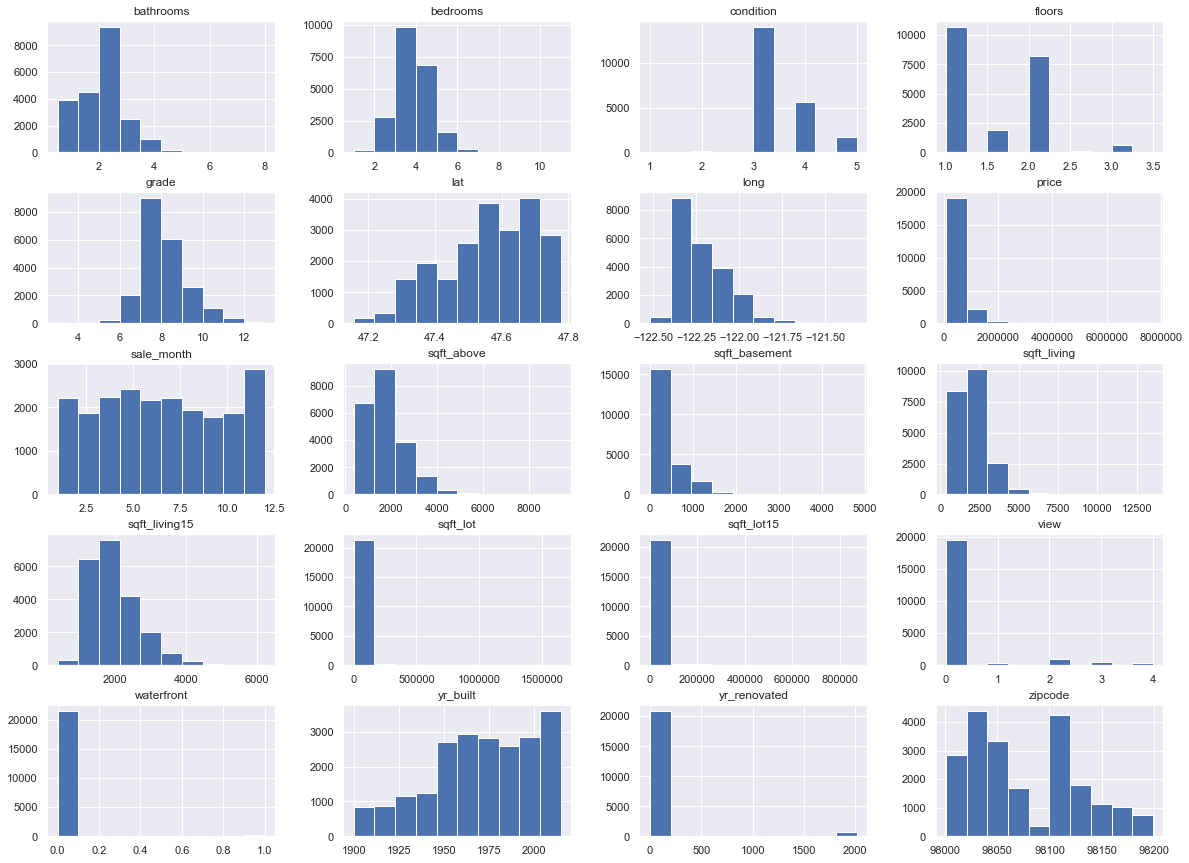

In [37]:
df.hist(figsize=(20,15));


## Outliers

We have to be very careful about outliers. Waterfront houses are very expensive and they are detected as outliers. The real outlier in this data was 33 bedroom house. We have changed it to a 3 bedroom house. The others are real houses but some of them are very expensive because of some properties we don't have information. These expensive houses can have a pool or a special garden.They can be at walking distance to Grade A schools or a walking trail or playground. So we will get rid of %0.1 both from the bottom and from the top.

In [38]:
Q1 = df.quantile(0.001)
Q3 = df.quantile(0.999)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

### Saving the cleaned data frame as a new data set.

In [39]:
df.to_csv("king_county_dataset_cleaned2.csv", index=False)


## Log transformation of data

Log transformation is an effective technique we can use to improve the performance of linear regression models. We make the distributions look muck normal and improve our models' predictive performance. Let's transform the continous variables by using logarithym of 'e'. 







In [40]:
non_normal = ['price','sqft_living', 'sqft_lot','sqft_above','sqft_basement',
              'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log1p(x))


## Normalizing the data

In [41]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['bathrooms', 'sqft_living', 'sqft_lot','sqft_above', 'sqft_basement', 'yr_built','yr_renovated','sqft_living15', 'sqft_lot15']:
    df[feat] = norm_feat(df[feat])


In [42]:
df.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_month
count,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00
mean,13.05,3.37,-0.00,0.00,-0.00,1.49,0.01,0.23,3.41,7.66,0.00,-0.00,0.00,0.00,98077.96,47.56,-122.21,0.00,-0.00,6.57
std,0.53,0.90,1.00,1.00,1.00,0.54,0.08,0.76,0.65,1.17,1.00,1.00,1.00,1.00,53.51,0.14,0.14,1.00,1.00,3.11
min,11.26,1.00,-2.10,-3.86,-3.04,1.00,0.00,0.00,1.00,3.00,-3.47,-0.79,-2.45,-0.19,98001.00,47.16,-122.52,-4.73,-3.06,1.00
25%,12.68,3.00,-0.48,-0.67,-0.52,1.00,0.00,0.00,3.00,7.00,-0.73,-0.79,-0.67,-0.19,98033.00,47.47,-122.33,-0.71,-0.52,4.00
50%,13.02,3.00,0.17,0.01,-0.06,1.50,0.00,0.00,3.00,7.00,-0.10,-0.79,0.14,-0.19,98065.00,47.57,-122.23,-0.07,-0.03,6.00
75%,13.38,4.00,0.50,0.69,0.32,2.00,0.00,0.00,4.00,8.00,0.72,1.21,0.88,-0.19,98118.00,47.68,-122.12,0.69,0.32,9.00
max,15.86,11.00,7.66,4.63,5.53,3.50,1.00,4.00,5.00,13.00,4.11,1.90,1.48,5.30,98199.00,47.78,-121.32,3.65,5.27,12.00


## Check the distributions again!

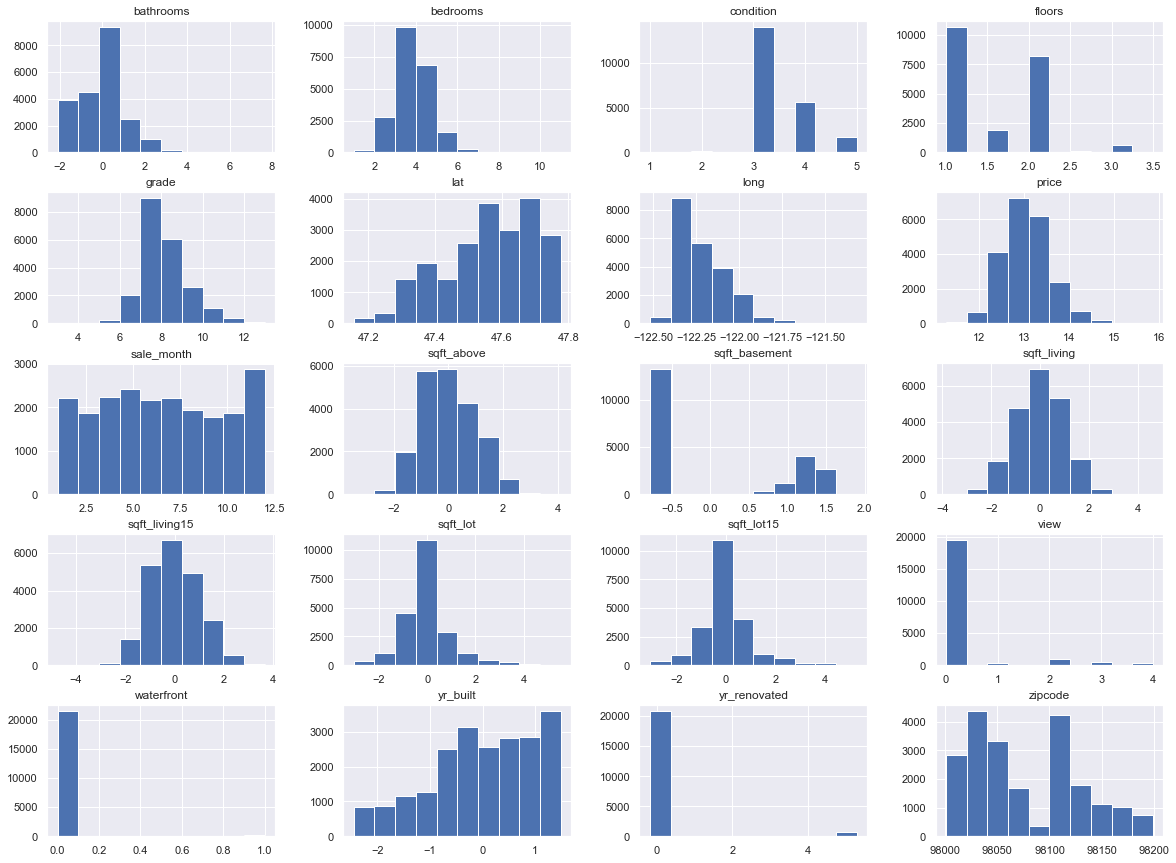

In [43]:
df.hist(figsize=(20,15));


We optained normal distributions in 'price', 'sqft_living','sqft_above', 'sqft_lot', 'yr_built', 'yr_renovated', 'sqft_living15' columns which is very good to apply linear regression.

## One-Hot Encoding Categorical Columns


#### Identifying Categorical Variables

These columns can be thought as categorical values. Bedrooms, floors, waterfront, wiev, grade and zipcode. We change their type to 'category' and make new columns by using pandas get_dummies() function.


In [44]:
df['bedrooms'] = df['bedrooms'].astype('category')
df['floors'] = df['floors'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['zipcode'] = df['zipcode'].astype('category')
df['sale_month'] = df['sale_month'].astype('category')


In [45]:
feats = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'sale_month']
df_feats = df[feats]
df_feats_zipcode=df_feats.copy()
df_feats = pd.get_dummies(df_feats, drop_first=True)

# Exploring the data

In [46]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_month
0,12.309987,3,-1.451612,-1.125683,-0.388509,1.0,0.0,0.0,3,7,-0.753610,-0.785202,-0.537420,-0.188896,98178,47.5112,-122.257,-1.035409,-0.395548,10
1,13.195616,3,0.174831,0.709834,-0.112772,2.0,0.0,0.0,3,7,0.673014,1.112346,-0.674345,5.291902,98125,47.7210,-122.319,-0.326807,-0.023625,12
2,12.100718,2,-1.451612,-2.131831,0.245671,1.0,0.0,0.0,3,6,-1.752832,-0.785202,-1.294001,-0.188896,98028,47.7379,-122.233,1.126666,0.042836,2
3,13.311331,4,1.150697,0.070792,-0.524259,1.0,0.0,0.0,5,7,-1.026876,1.372122,-0.196328,-0.188896,98136,47.5208,-122.393,-0.990173,-0.546252,12
4,13.142168,3,-0.150458,-0.292723,0.008853,1.0,0.0,0.0,3,8,0.073617,-0.785202,0.548008,-0.188896,98074,47.6168,-122.045,-0.134239,-0.045777,2


In [47]:
df_feats.head()

,price,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,sale_month_2,sale_month_3,sale_month_4,sale_month_5,sale_month_6,sale_month_7,sale_month_8,sale_month_9,sale_month_10,sale_month_11,sale_month_12
0,12.309987,-1.451612,-1.125683,-0.388509,-0.753610,-0.785202,-0.537420,-0.188896,-1.035409,-0.395548,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,13.195616,0.174831,0.709834,-0.112772,0.673014,1.112346,-0.674345,5.291902,-0.326807,-0.023625,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.100718,-1.451612,-2.131831,0.245671,-1.752832,-0.785202,-1.294001,-0.188896,1.126666,0.042836,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,13.311331,1.150697,0.070792,-0.524259,-1.026876,1.372122,-0.196328,-0.188896,-0.990173,-0.546252,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,13.142168,-0.150458,-0.292723,0.008853,0.073617,-0.785202,0.548008,-0.188896,-0.134239,-0.045777,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Check for Linearity

The linearity assumptions requires that there is a linear relationship between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant.

If we try to fit a linear model to a non-linear data set, OLS will fail to capture the trend mathematically, resulting in an inaccurate relationship. This will also result in erroneous predictions on an unseen data set.

In [48]:
df_plot=df[['price','bathrooms','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built','sqft_living15','sqft_lot15']].copy()

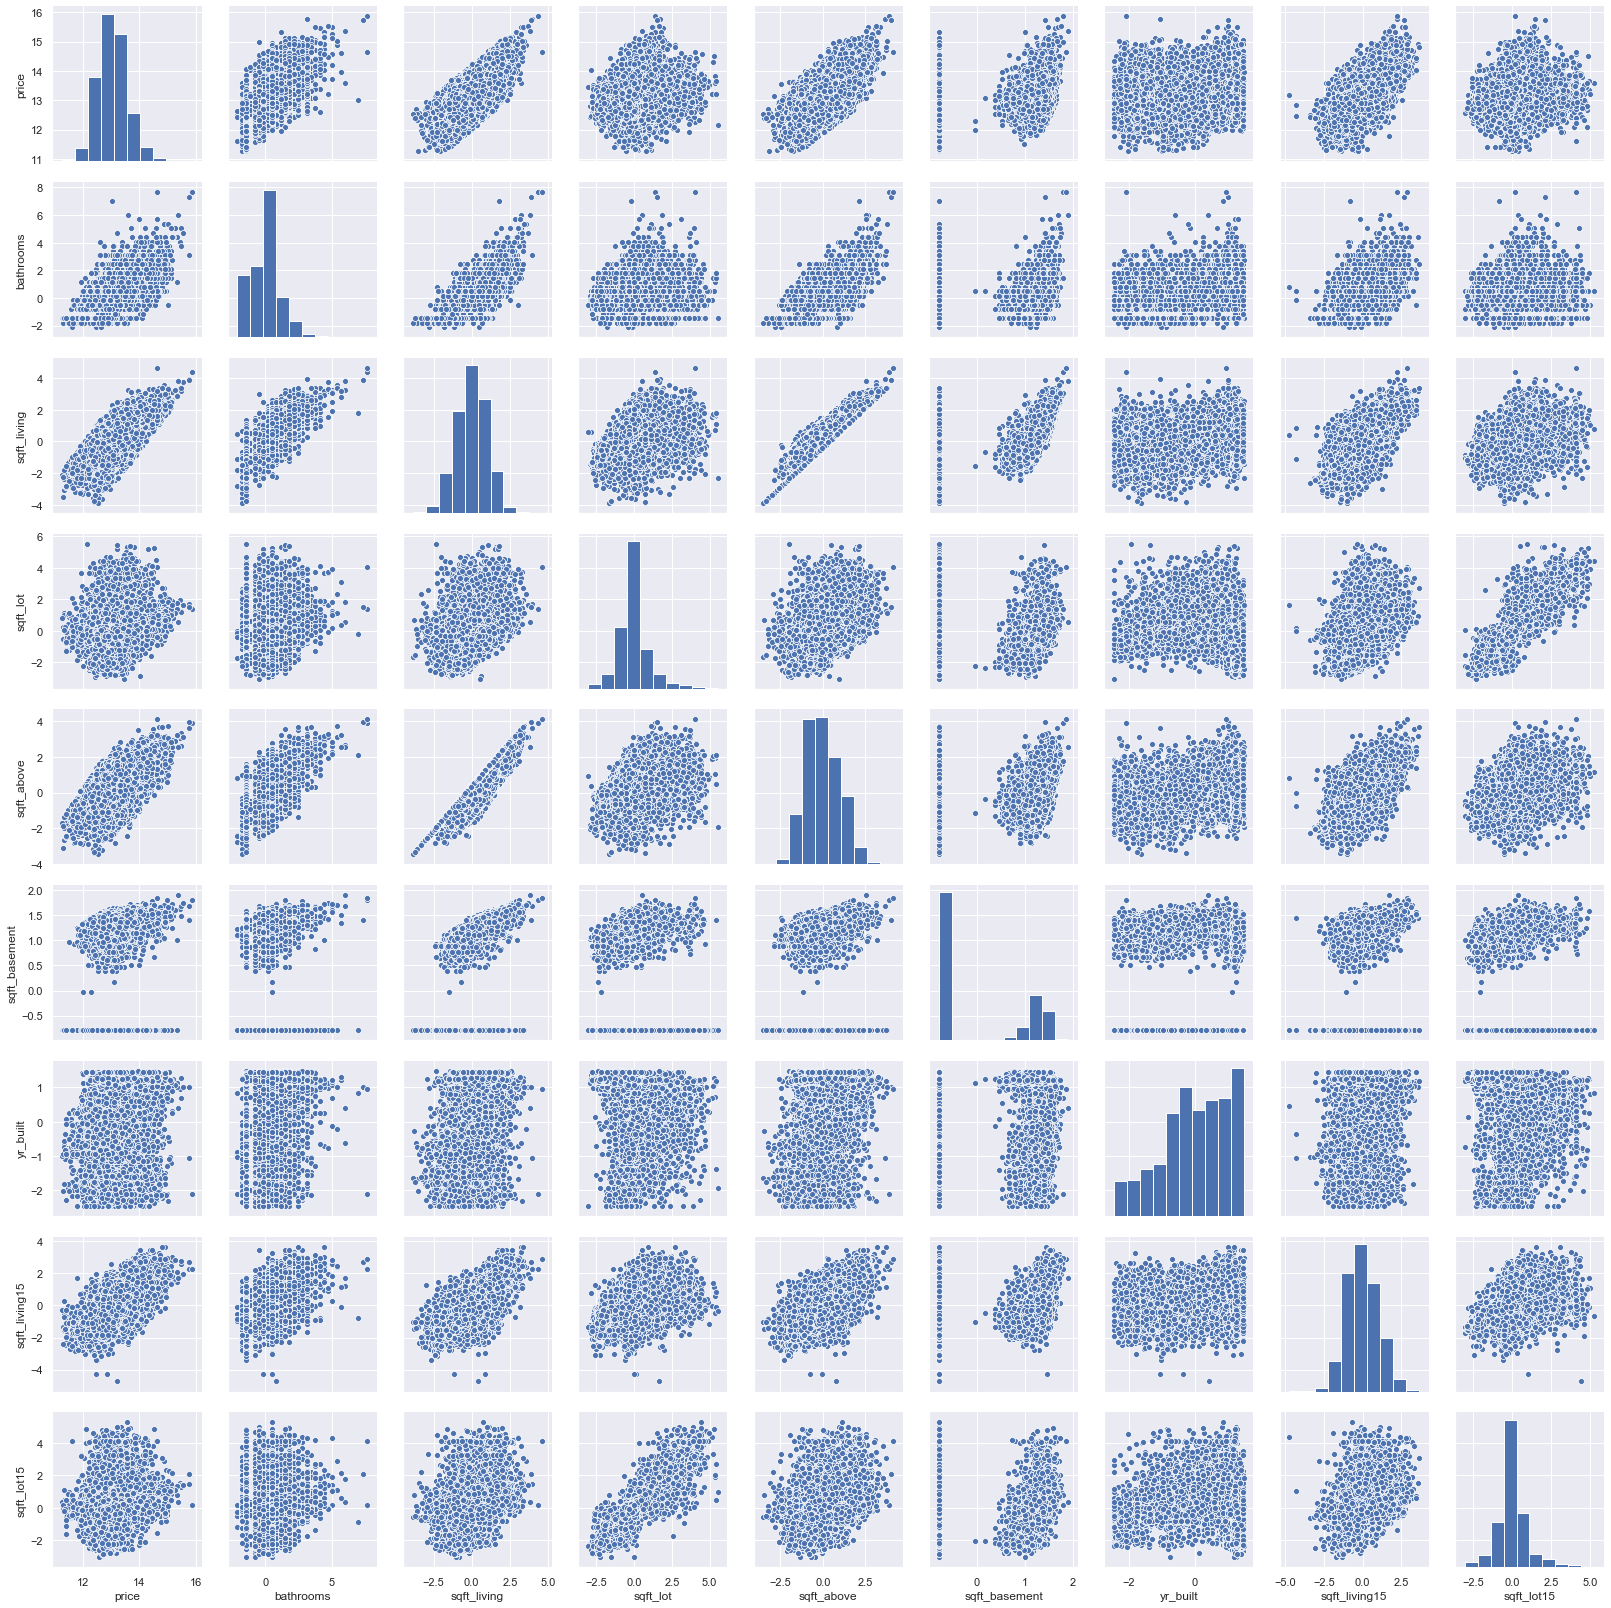

In [49]:
sns.pairplot(df_plot);
plt.show()

We make a scatter plot of continous columns and check if the distributions are linear.

When we check the linearity of parameters we see that 'price' has a linear relationship with other columns except 'yr_built'. What we see here is there are strong linear relationships between some parameters. We need to check the distributions one by one to avoid multicollinearity.

## Check for Multicollinearity

It is seen very well in the pairplot that number of bathrooms and square feet of houses have linearity with price of the house.  Let's explore some other relationships with jointplots. We changed the first data frame 'df' a lot so we use the cleaned data frame as 'df2'.

In [50]:
# Load the cleaned data set
df2=pd.read_csv('king_county_dataset_cleaned2.csv')

#### Longitude and Latitude

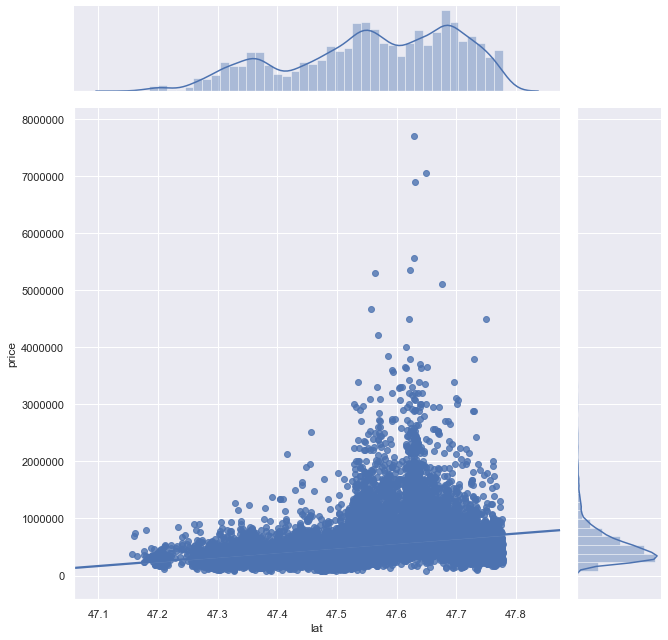

In [51]:
fig = sns.jointplot(x='lat', y='price', data=df2,height=9,kind='reg');

Latitude has a linear relationship with price. North of the city is more expensive than the south.

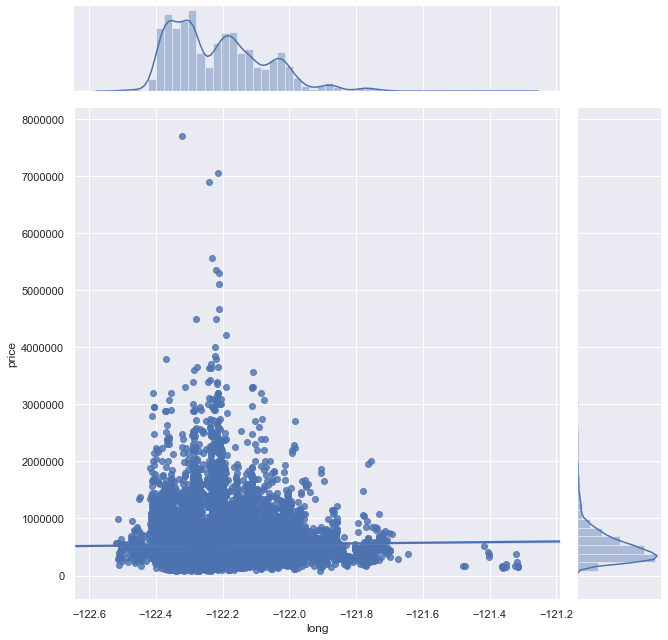

In [52]:
fig = sns.jointplot(x='long', y='price', data=df2,height=9,kind='reg');

There is not a linear relationship between the longitude and price. East and west of the city have similar prices.

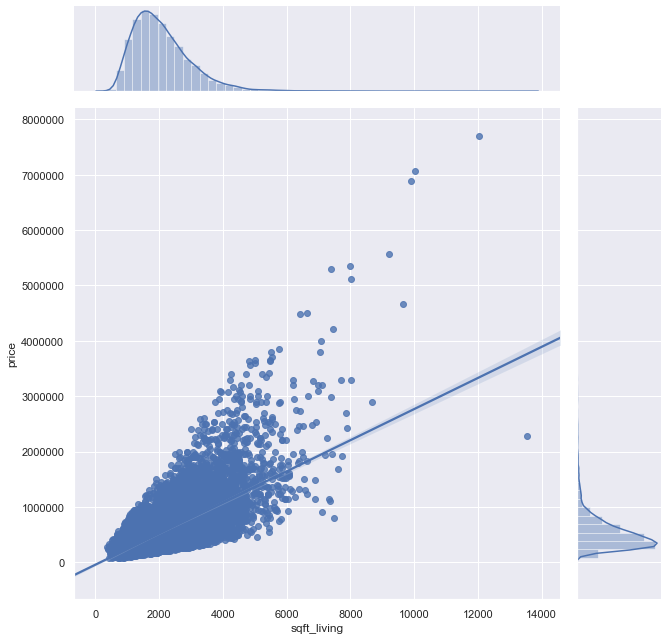

In [92]:
fig = sns.jointplot(x='sqft_living', y='price', data=df2,height=9,kind='reg');

#### Sale month

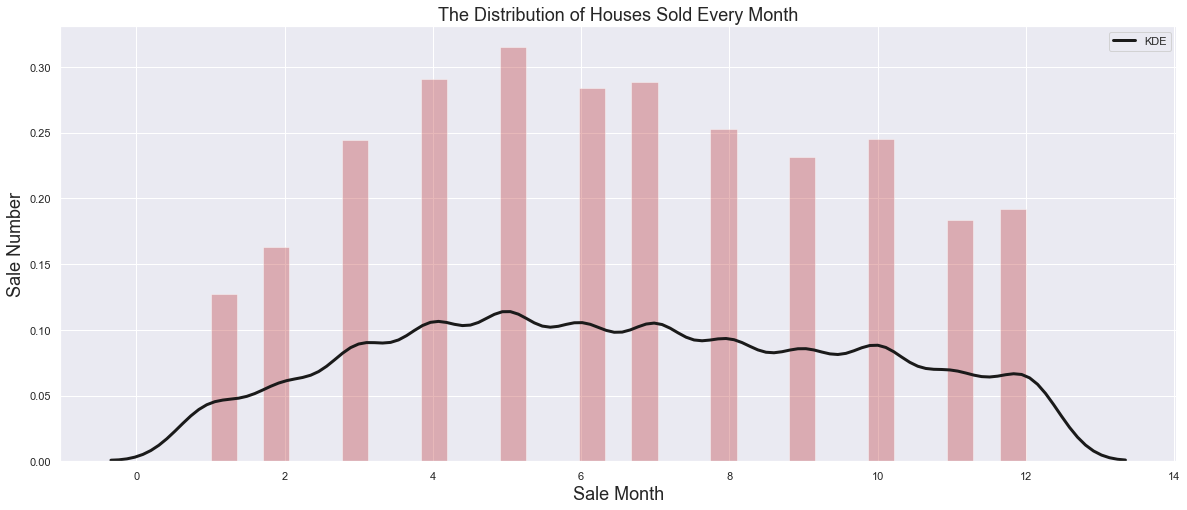

In [53]:
fig = plt.figure(figsize = (20,8));
fig =sns.distplot(df2['sale_month'],norm_hist=True,color='r',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.title('The Distribution of Houses Sold Every Month',fontsize=18);
plt.xlabel("Sale Month", fontsize=18);
plt.ylabel('Sale Number', fontsize=18);
plt.show();


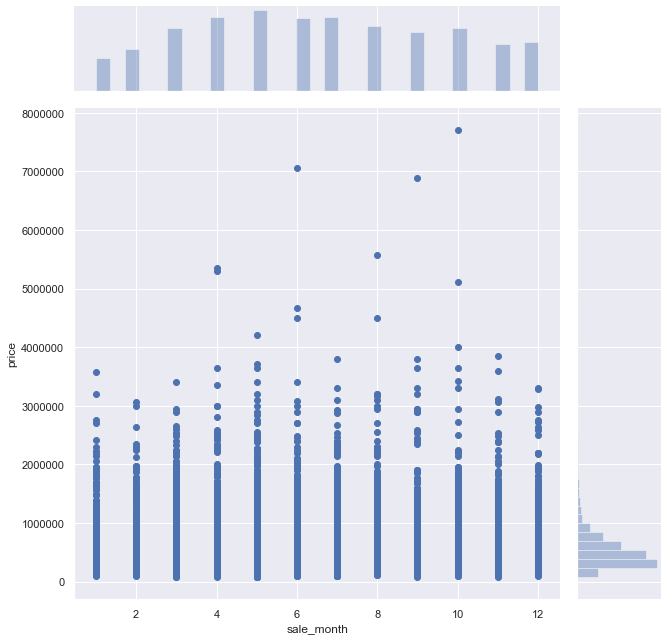

In [54]:
fig = sns.jointplot(x='sale_month', y='price', data=df2,height=9);

According to two graphs May is the best month to sell a house. 

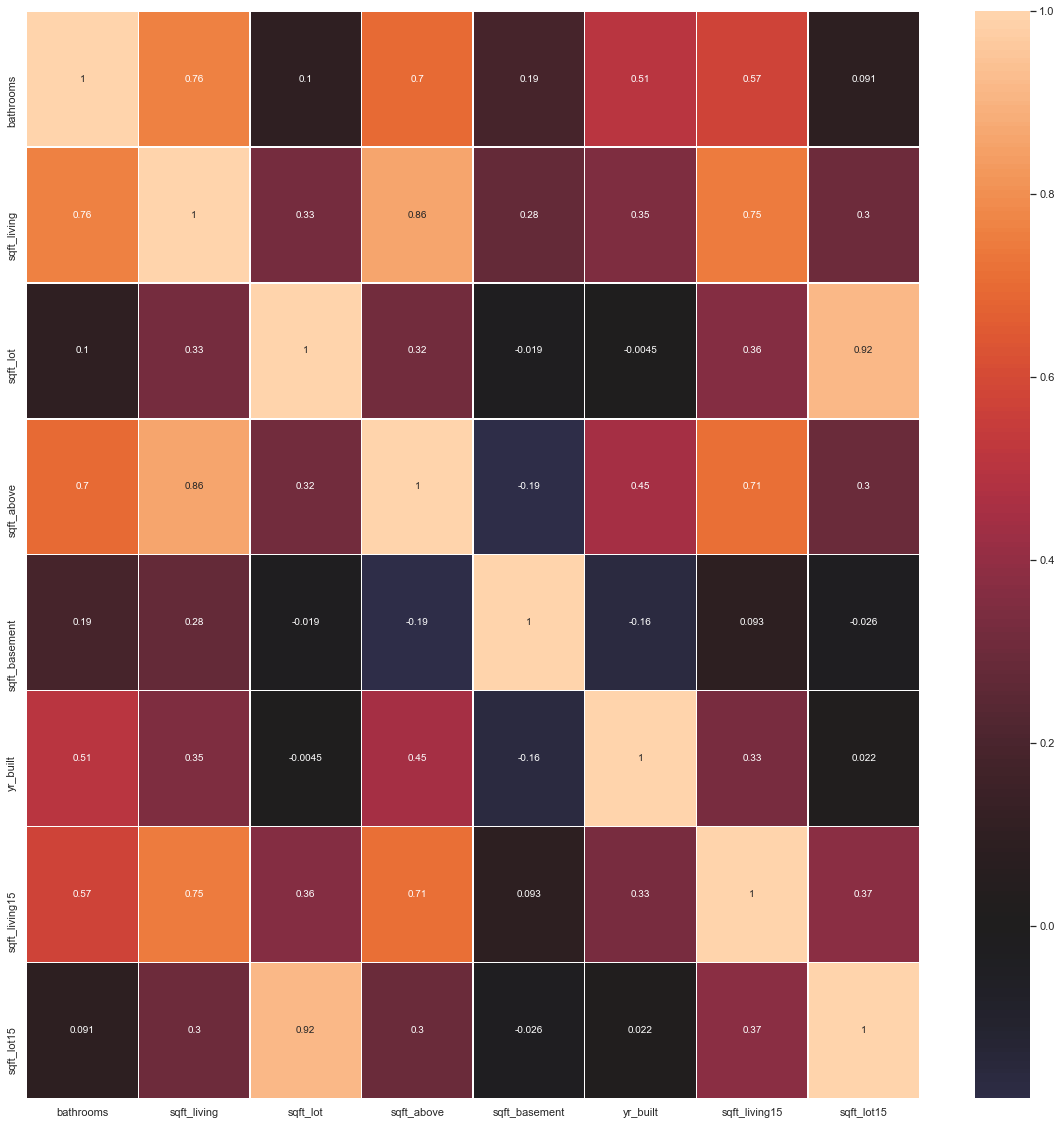

In [55]:
df_heatmap=df_plot.drop(['price'],axis=1);
plt.figure(figsize=(20,20));
ax=sns.heatmap(df_heatmap.corr(), center=0, linewidths=.5,annot=True);
bottom, top = ax.get_ylim();
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.show();

#### Find correlated parameters

This heat map makes us see the correlated parameters but it is difficult to find the correlated ones from this map. 
We get the ones whose correlations are bigger than 0.75.

In [56]:
df_heatmap.corr() > 0.75


,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
bathrooms,True,True,False,False,False,False,False,False
sqft_living,True,True,False,True,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,True
sqft_above,False,True,False,True,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False
yr_built,False,False,False,False,False,True,False,False
sqft_living15,False,False,False,False,False,False,True,False
sqft_lot15,False,False,True,False,False,False,False,True


# Modeling the data

## Baseline Model 


In this first modeling attempt we push all parameters except zip code to the model. We see how it works. Then we are going to drop some parameters according to the p-values and variance inflation factors.

In [57]:
outcome = 'price'
x_cols = ['bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10',
       'bedrooms_11', 'floors_1_5', 'floors_2_0', 'floors_2_5',
       'floors_3_0', 'floors_3_5', 'waterfront_1_0', 'view_1_0', 'view_2_0',
       'view_3_0', 'view_4_0', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13']

In [58]:
df_feats.columns = df_feats.columns.str.replace(r"[.]", "_")

In [59]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_feats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1017.
Date:                Thu, 30 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:08:40   Log-Likelihood:                -4818.2
No. Observations:               21594   AIC:                             9724.
Df Residuals:                   21550   BIC:                         1.008e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.5859      0.309     40.795      0.000      11.981      13.191
bathrooms          0.0530      0.004     13.786      0.000       0.045       0.061
sqft_living        0.0792      0.010      7.861      0.000       0.059       0.099
sqft_lot          -0.0088      0.005     -1.635      0.102      -0.019       0.002
sqft_above         0.0636      0.010      6.378      0.000       0.044       0.083
sqft_basement      0.0504      0.005     10.329      0.000       0.041       0.060
yr_built          -0.1568      0.003    -47.868      0.000      -0.163      -0.150
yr_renovated       0.0073      0.002      3.333      0.001       0.003       0.012
sqft_living15      0.0898      0.004     25.650      0.000       0.083       0.097
sqft_lot15        -0.0368      0.005     -6.929      0.000      -0.047      -0.026
bedrooms_2        -0.0122      0.023     -0.530      0.596      -0.057       0.033
bedrooms_3        -0.1201      0.023     -5.174      0.000      -0.166      -0.075
bedrooms_4        -0.1479      0.024     -6.200      0.000      -0.195      -0.101
bedrooms_5        -0.1385      0.025     -5.505      0.000      -0.188      -0.089
bedrooms_6        -0.1802      0.031     -5.894      0.000      -0.240      -0.120
bedrooms_7        -0.2210      0.055     -3.998      0.000      -0.329      -0.113
bedrooms_8        -0.0545      0.088     -0.618      0.536      -0.227       0.118
bedrooms_9        -0.2526      0.127     -1.992      0.046      -0.501      -0.004
bedrooms_10       -0.0476      0.177     -0.270      0.788      -0.394       0.299
bedrooms_11       -0.3883      0.304     -1.277      0.202      -0.984       0.208
floors_1_5         0.0445      0.008      5.290      0.000       0.028       0.061
floors_2_0         0.0275      0.007      3.906      0.000       0.014       0.041
floors_2_5         0.0634      0.025      2.527      0.012       0.014       0.113
floors_3_0         0.2236      0.015     14.863      0.000       0.194       0.253
floors_3_5         0.1742      0.116      1.507      0.132      -0.052       0.401
waterfront_1_0     0.3668      0.031     11.925      0.000       0.307       0.427
view_1_0           0.1348      0.017      7.918      0.000       0.101       0.168
view_2_0           0.0698      0.010      6.757      0.000       0.050       0.090
view_3_0           0.0998      0.014      7.096      0.000       0.072       0.127
view_4_0           0.2137      0.021     10.002      0.000       0.172       0.256
condition_2        0.0370      0.061      0.606      0.545      -0.083       0.157
condition_3        0.1849      0.057      3.252      0.001       0.073       0.296
condition_4        0.2124      0.057      3.736      0.000       0.101       0.324
condition_5        0.2819      0.057      4.928      0.000       0.170       0.394
grade_4     

#### Inference from the model summary
By infering the model summary(OLS regression results) we can say that 

### Checking for Normality
We should check to ensure that our residuals are normally distributed.Q-Q plots are helpful for analyzing normality.

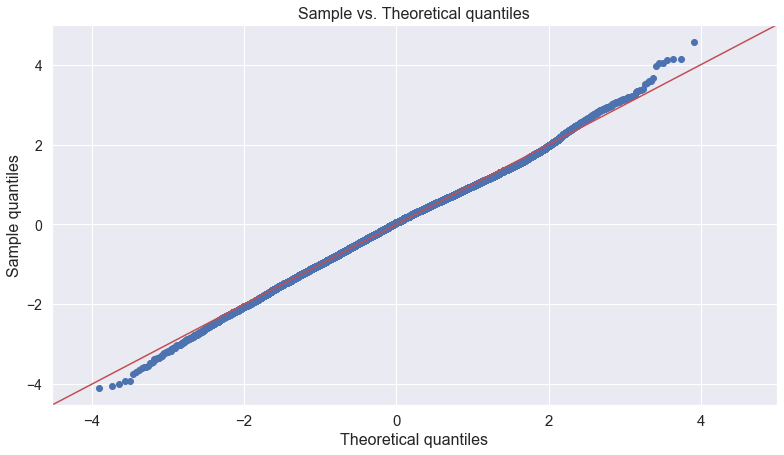

In [60]:
fig, ax = plt.subplots(figsize=(13, 7))
sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True, ax=ax)
plt.xlabel('Theoretical quantiles', fontsize=16)
plt.ylabel('Sample quantiles', fontsize=16)
plt.title('Sample vs. Theoretical quantiles', fontsize=16)
plt.xticks(fontsize=15); plt.yticks(fontsize=14);
plt.show();


#### Inference from the Q-Q plot
Ideally, this plot should show a straight line. A curved, distorted line suggests residuals have a non-normal distribution. We need to make improve the model. 

### Checking for Homoscedasticity
A scatter plot is good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line). The residuals are equal across the regression line.

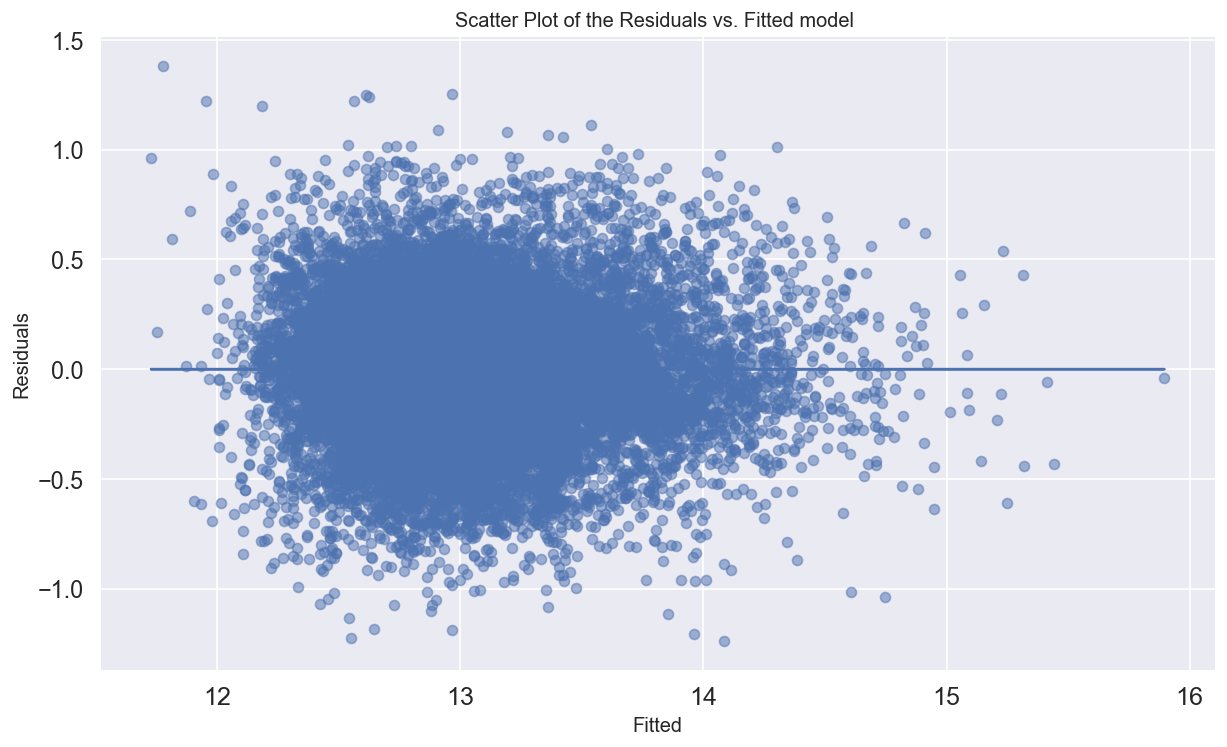

In [61]:
plt.figure(figsize=(12, 7), dpi= 120,  edgecolor='k');
plt.scatter(model.predict(df_feats[x_cols]), model.resid, alpha=0.5);
plt.plot(model.predict(df_feats[x_cols]), [0 for i in range(len(df_feats))]);
plt.gca().set(xlabel='Fitted', ylabel='Residuals',title='Scatter Plot of the Residuals vs. Fitted model ')
plt.xticks(fontsize=15); plt.yticks(fontsize=14);
plt.show();

### Checking for multicollinearity
Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. It means that if VIF value of a parameter is higher than app.5 we need to eliminate this parameter. In this model we eliminate the parameters by using stepwise selection. We double check the results via VIF.

In [62]:
X = df_feats[x_cols]

In [63]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bathrooms', 3.4788775455774275),
 ('sqft_living', 23.922270174428856),
 ('sqft_lot', 6.890133746212493),
 ('sqft_above', 23.429425815982846),
 ('sqft_basement', 5.6074151906184),
 ('yr_built', 2.5280345132085786),
 ('yr_renovated', 1.1359543125137344),
 ('sqft_living15', 2.887170097148353),
 ('sqft_lot15', 6.65735379865336),
 ('bedrooms_2', 16.03896298731584),
 ('bedrooms_3', 57.783476017614795),
 ('bedrooms_4', 42.7331586132522),
 ('bedrooms_5', 11.059566331930569),
 ('bedrooms_6', 2.7728696004333626),
 ('bedrooms_7', 1.266865607272781),
 ('bedrooms_8', 1.103986445968317),
 ('bedrooms_9', 1.0528299896311408),
 ('bedrooms_10', 1.0220220681478296),
 ('bedrooms_11', 1.0087210082971085),
 ('floors_1_5', 1.4741111038398822),
 ('floors_2_0', 4.45028245468195),
 ('floors_2_5', 1.1048054036474821),
 ('floors_3_0', 1.5087230561740552),
 ('floors_3_5', 1.0194499729088364),
 ('waterfront_1_0', 1.5070807371705153),
 ('view_1_0', 1.0438971197309366),
 ('view_2_0', 1.1122571125748943),
 ('view_3

## Model Refinement I

In [64]:
outcome = 'price'
x_cols = [ 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10',
       'bedrooms_11', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'floors_3_5', 'waterfront_1_0', 'view_1_0', 'view_2_0', 'view_3_0',
       'view_4_0', 'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'sale_month_2', 
       'sale_month_3', 'sale_month_4', 'sale_month_5', 'sale_month_6',
       'sale_month_7', 'sale_month_8', 'sale_month_9', 'sale_month_10',
       'sale_month_11', 'sale_month_12','zipcode_98002','zipcode_98014',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155',
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199']


#### Fitting the model

We used stats models OLS regression. We put x.cols to the model and tried to predict the target parameter 'price'.

In [65]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_feats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1379.
Date:                Thu, 30 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:08:43   Log-Likelihood:                 6818.1
No. Observations:               21594   AIC:                        -1.339e+04
Df Residuals:                   21470   BIC:                        -1.240e+04
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.6249      0.181     69.713      0.000      12.270      12.980
bathrooms          0.0296      0.002     13.075      0.000       0.025       0.034
sqft_living        0.0999      0.006     16.843      0.000       0.088       0.111
sqft_lot           0.0652      0.003     20.227      0.000       0.059       0.071
sqft_above         0.0818      0.006     13.936      0.000       0.070       0.093
sqft_basement      0.0132      0.003      4.574      0.000       0.008       0.019
yr_built          -0.0031      0.002     -1.333      0.183      -0.008       0.001
yr_renovated       0.0129      0.001      9.930      0.000       0.010       0.015
sqft_living15      0.0484      0.002     22.251      0.000       0.044       0.053
sqft_lot15        -0.0178      0.003     -5.568      0.000      -0.024      -0.012
bedrooms_2        -0.0196      0.014     -1.450      0.147      -0.046       0.007
bedrooms_3        -0.0442      0.014     -3.243      0.001      -0.071      -0.018
bedrooms_4        -0.0470      0.014     -3.352      0.001      -0.075      -0.020
bedrooms_5        -0.0662      0.015     -4.471      0.000      -0.095      -0.037
bedrooms_6        -0.0993      0.018     -5.524      0.000      -0.135      -0.064
bedrooms_7        -0.2067      0.032     -6.378      0.000      -0.270      -0.143
bedrooms_8        -0.1198      0.052     -2.315      0.021      -0.221      -0.018
bedrooms_9        -0.2701      0.074     -3.628      0.000      -0.416      -0.124
bedrooms_10       -0.2676      0.103     -2.586      0.010      -0.470      -0.065
bedrooms_11        0.0535      0.178      0.301      0.764      -0.295       0.403
floors_1_5         0.0032      0.005      0.638      0.523      -0.007       0.013
floors_2_0        -0.0132      0.004     -3.097      0.002      -0.022      -0.005
floors_2_5         0.0039      0.015      0.265      0.791      -0.025       0.033
floors_3_0        -0.0806      0.009     -8.562      0.000      -0.099      -0.062
floors_3_5        -0.0679      0.068     -1.002      0.316      -0.201       0.065
waterfront_1_0     0.4408      0.018     24.128      0.000       0.405       0.477
view_1_0           0.1113      0.010     11.029      0.000       0.091       0.131
view_2_0           0.1010      0.006     16.391      0.000       0.089       0.113
view_3_0           0.1730      0.008     20.635      0.000       0.157       0.189
view_4_0           0.2899      0.013     22.872      0.000       0.265       0.315
condition_2        0.1503      0.036      4.200      0.000       0.080       0.220
condition_3        0.2841      0.033      8.523      0.000       0.219       0.349
condition_4        0.3258      0.033      9.768      0.000       0.260       0.391
condition_5        0.3952      0.034     11.775      0.000       0.329       0.461
grade_4     

#### Inference from the model summary
By infering the model summary(OLS regression results) we can say that We have a good R-squared value. Adjusted R- squared value is not very different from the R-squared value because the sample size is big. We have more than 27 thousand houses to fit the model. P-values of some parameters are higher than 0.05 which decreases confidence level. We need to eliminate the columns by stepwise selection.

### Checking for Normality


We should check to ensure that our residuals are normally distributed.Q-Q plots are helpful for analyzing normality.

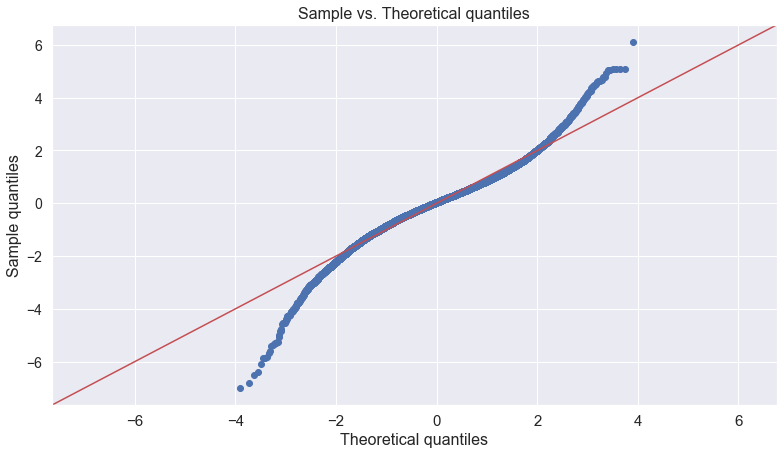

In [66]:
fig, ax = plt.subplots(figsize=(13, 7))
sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True, ax=ax)
plt.xlabel('Theoretical quantiles', fontsize=16)
plt.ylabel('Sample quantiles', fontsize=16)
plt.title('Sample vs. Theoretical quantiles', fontsize=16)
plt.xticks(fontsize=15); plt.yticks(fontsize=14);
plt.show();


#### Inference from the Q-Q plot
Ideally, this plot should show a straight line. A curved, distorted line suggests residuals have a non-normal distribution. We need to make improve the model. 

### Checking for Homoscedasticity

A scatter plot is good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line). The residuals are equal across the regression line.

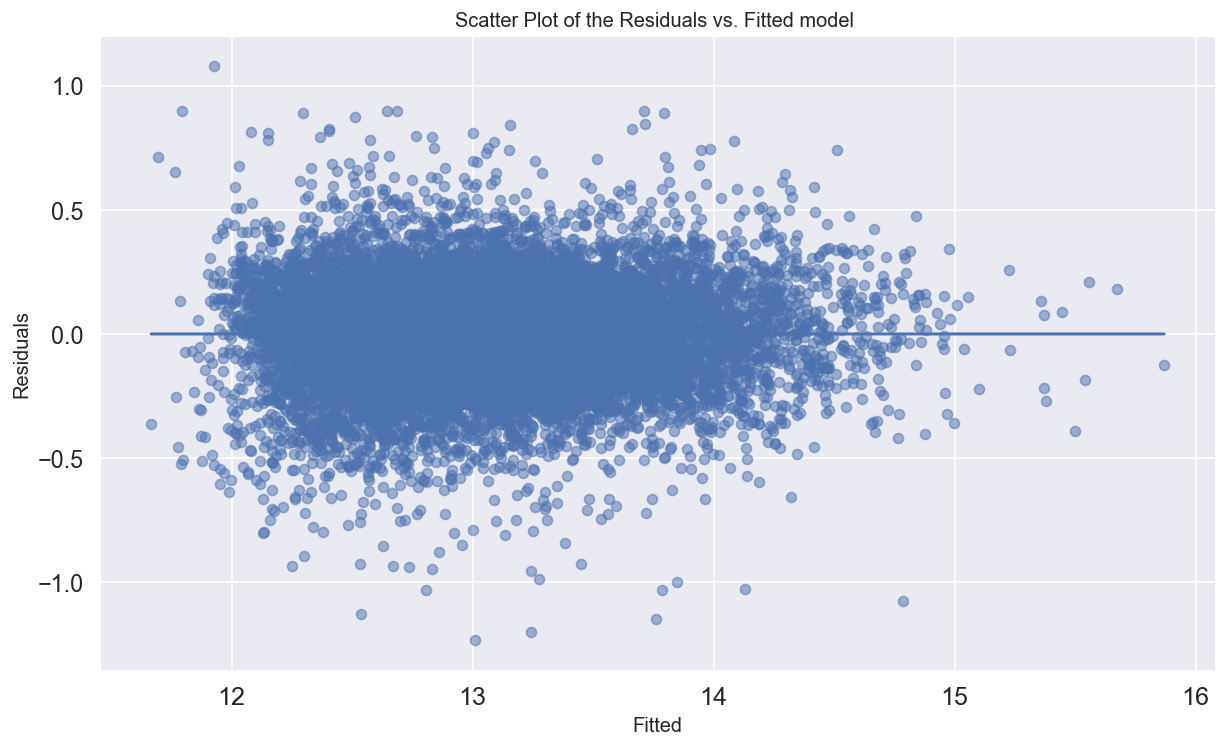

In [67]:
plt.figure(figsize=(12, 7), dpi= 120,  edgecolor='k');
plt.scatter(model.predict(df_feats[x_cols]), model.resid, alpha=0.5);
plt.plot(model.predict(df_feats[x_cols]), [0 for i in range(len(df_feats))]);
plt.gca().set(xlabel='Fitted', ylabel='Residuals',title='Scatter Plot of the Residuals vs. Fitted model ')
plt.xticks(fontsize=15); plt.yticks(fontsize=14);
plt.show();

### Checking for multicollinearity
Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. It means that if VIF value of a parameter is higher than app.5 we need to eliminate this parameter. In this model we eliminate the parameters by using stepwise selection. We double check the results via VIF.


In [68]:
X = df_feats[x_cols]

In [69]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bathrooms', 3.532810261147149),
 ('sqft_living', 24.231433043470336),
 ('sqft_lot', 7.158113982542448),
 ('sqft_above', 23.774356878239505),
 ('sqft_basement', 5.761840207226945),
 ('yr_built', 3.670114419088229),
 ('yr_renovated', 1.1577792100722712),
 ('sqft_living15', 3.2588421558226526),
 ('sqft_lot15', 7.01812132103833),
 ('bedrooms_2', 16.121409543994105),
 ('bedrooms_3', 58.36541761361933),
 ('bedrooms_4', 43.26941635682525),
 ('bedrooms_5', 11.215246388978603),
 ('bedrooms_6', 2.8059964600891782),
 ('bedrooms_7', 1.2747984536881152),
 ('bedrooms_8', 1.1108432031738542),
 ('bedrooms_9', 1.0621756000947318),
 ('bedrooms_10', 1.0260736565318946),
 ('bedrooms_11', 1.012400920121112),
 ('floors_1_5', 1.5426225469233041),
 ('floors_2_0', 4.802944047613901),
 ('floors_2_5', 1.136634471432347),
 ('floors_3_0', 1.7297572172422735),
 ('floors_3_5', 1.024651760077093),
 ('waterfront_1_0', 1.5560007001907186),
 ('view_1_0', 1.072345061489931),
 ('view_2_0', 1.1589033915180373),
 ('view_

#### Inference from the VIF values
According to the results here grade dummy variables are problematic. They have huge values which shows multicollinearity between columns. We will drop some of them after the stepwise selection. And check the VIF values again.

### K-fold Cross Validation for Baseline Model

In [70]:
X = df_feats[x_cols]
y = df_feats['price']

linreg = LinearRegression()
cvs_10=cross_val_score(linreg, X, y, cv=10)
cvs_10_res_mean = round(np.mean(cvs_10),5)
cv_10_res_std = round(np.std(cvs_10),5)
print(f'Mean cross validation score for 10 fold is {cvs_10_res_mean}')
print(f'Standard deviation of the score is {cv_10_res_std}')

Mean cross validation score for 10 fold is -5.591601865806545e+20
Standard deviation of the score is 1.1252419423335599e+21


#### Inference from the C-V results
The code above gives the mean values of the results after 10 tests with different train and test splits. These values are too high and the model is overfitted.

### Perform stepwise selection

#### Stepwise selection function

There is not a built-in function in Python libraries for stepwise selection. We are going to use this function.

In [71]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [72]:
X = df_feats[x_cols]
y = df_feats['price']
result = stepwise_selection(X, y, verbose = False)
print('resulting features:')
print(result)

resulting features:
['grade_7', 'sqft_living15', 'sqft_living', 'grade_6', 'zipcode_98023', 'zipcode_98004', 'grade_8', 'grade_5', 'grade_9', 'waterfront_1_0', 'zipcode_98003', 'zipcode_98092', 'zipcode_98058', 'zipcode_98038', 'zipcode_98002', 'zipcode_98032', 'zipcode_98039', 'bathrooms', 'zipcode_98033', 'zipcode_98040', 'zipcode_98112', 'zipcode_98115', 'zipcode_98117', 'zipcode_98103', 'zipcode_98199', 'zipcode_98105', 'zipcode_98119', 'zipcode_98107', 'zipcode_98116', 'zipcode_98109', 'zipcode_98122', 'zipcode_98102', 'view_4_0', 'zipcode_98006', 'zipcode_98052', 'zipcode_98136', 'zipcode_98144', 'sqft_lot', 'zipcode_98008', 'zipcode_98005', 'grade_4', 'zipcode_98053', 'view_3_0', 'zipcode_98029', 'zipcode_98126', 'zipcode_98125', 'zipcode_98034', 'zipcode_98177', 'zipcode_98007', 'condition_5', 'sale_month_4', 'zipcode_98074', 'zipcode_98075', 'grade_10', 'zipcode_98027', 'view_2_0', 'sqft_above', 'zipcode_98133', 'zipcode_98118', 'zipcode_98072', 'zipcode_98155', 'condition_4',

## Model Refinement II


We will put the resulting features to the model and drop others. After the refinement we will check three assumptions again.

In [73]:
outcome = 'price'
x_cols = ['sqft_living', 'sqft_living15', 'zipcode_98004', 'zipcode_98023', 'view_4_0', 'grade_7', 'grade_6', 'grade_8', 
            'grade_5', 'grade_9', 'zipcode_98003', 'zipcode_98092', 'zipcode_98058', 'zipcode_98038', 'zipcode_98002', 
            'zipcode_98032', 'bathrooms', 'zipcode_98039', 'zipcode_98040', 'zipcode_98033', 'zipcode_98112', 'zipcode_98115',
            'zipcode_98103', 'zipcode_98117', 'zipcode_98199', 'zipcode_98105', 'zipcode_98119', 'zipcode_98107', 'zipcode_98109',
            'waterfront_1_0', 'zipcode_98116', 'zipcode_98122', 'zipcode_98102', 'zipcode_98006', 'zipcode_98052', 'zipcode_98136',
            'zipcode_98144', 'sqft_lot', 'zipcode_98008', 'zipcode_98005', 'grade_4', 'zipcode_98053', 'view_3_0', 'zipcode_98029', 
            'zipcode_98126', 'zipcode_98125', 'zipcode_98034', 'zipcode_98177', 'zipcode_98007', 'condition_5', 'sale_month_4', 
          'zipcode_98074', 'zipcode_98075', 'grade_10', 'zipcode_98027', 'view_2_0', 'sqft_above', 'zipcode_98133', 'zipcode_98118', 
          'zipcode_98072', 'zipcode_98155', 'condition_4', 'condition_3', 'view_1_0', 'sale_month_3', 'zipcode_98011', 'zipcode_98065',
          'zipcode_98028', 'zipcode_98077', 'zipcode_98106', 'yr_renovated', 'zipcode_98108', 'zipcode_98059', 'zipcode_98056', 
          'zipcode_98024', 'grade_11', 'floors_3_0', 'zipcode_98166', 'zipcode_98045', 'zipcode_98146', 'zipcode_98019',
          'zipcode_98014', 'zipcode_98070', 'zipcode_98010', 'zipcode_98178', 'zipcode_98055', 'sqft_lot15', 'sqft_basement',
          'bedrooms_7', 'bedrooms_2', 'zipcode_98148', 'grade_13', 'sale_month_2', 'sale_month_5', 
            'condition_2', 'bedrooms_6', 'floors_2_0', 'bedrooms_5', 'zipcode_98168', 'zipcode_98188', 'bedrooms_9']

#### Fitting the model

In [74]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_feats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1675.
Date:                Thu, 30 Apr 2020   Prob (F-statistic):               0.00
Time:                        08:15:14   Log-Likelihood:                 6781.8
No. Observations:               21594   AIC:                        -1.336e+04
Df Residuals:                   21492   BIC:                        -1.255e+04
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.7482      0.039    323.489      0.000      12.671      12.825
sqft_living        0.0972      0.006     16.804      0.000       0.086       0.109
sqft_living15      0.0492      0.002     22.743      0.000       0.045       0.053
zipcode_98004      1.0771      0.011     97.814      0.000       1.055       1.099
zipcode_98023     -0.0693      0.009     -7.748      0.000      -0.087      -0.052
view_4_0           0.2915      0.013     23.011      0.000       0.267       0.316
grade_7           -0.5274      0.020    -25.868      0.000      -0.567      -0.487
grade_6           -0.5953      0.021    -28.015      0.000      -0.637      -0.554
grade_8           -0.4463      0.020    -22.428      0.000      -0.485      -0.407
grade_5           -0.6600      0.024    -27.322      0.000      -0.707      -0.613
grade_9           -0.3316      0.020    -16.844      0.000      -0.370      -0.293
zipcode_98003     -0.0274      0.011     -2.410      0.016      -0.050      -0.005
zipcode_98092     -0.0329      0.010     -3.182      0.001      -0.053      -0.013
zipcode_98058      0.1142      0.009     12.342      0.000       0.096       0.132
zipcode_98038      0.1167      0.008     13.860      0.000       0.100       0.133
zipcode_98002     -0.0517      0.013     -3.891      0.000      -0.078      -0.026
zipcode_98032     -0.0590      0.016     -3.598      0.000      -0.091      -0.027
bathrooms          0.0284      0.002     13.100      0.000       0.024       0.033
zipcode_98039      1.2391      0.026     48.144      0.000       1.189       1.290
zipcode_98040      0.8272      0.012     70.796      0.000       0.804       0.850
zipcode_98033      0.7406      0.010     77.809      0.000       0.722       0.759
zipcode_98112      1.0389      0.012     87.082      0.000       1.016       1.062
zipcode_98115      0.8076      0.009     93.383      0.000       0.791       0.825
zipcode_98103      0.8386      0.009     94.700      0.000       0.821       0.856
zipcode_98117      0.8149      0.009     91.782      0.000       0.797       0.832
zipcode_98199      0.8414      0.011     75.865      0.000       0.820       0.863
zipcode_98105      0.9372      0.013     73.838      0.000       0.912       0.962
zipcode_98119      0.9787      0.014     69.793      0.000       0.951       1.006
zipcode_98107      0.8616      0.012     71.672      0.000       0.838       0.885
zipcode_98109      0.9980      0.018     56.326      0.000       0.963       1.033
waterfront_1_0     0.4441      0.018     24.306      0.000       0.408       0.480
zipcode_98116      0.7501      0.011     69.000      0.000       0.729       0.771
zipcode_98122      0.8133      0.012     70.595      0.000       0.791       0.836
zipcode_98102      0.9677      0.018     53.147      0.000       0.932       1.003
zipcode_9800

### Checking for Normality


We should check to ensure that our residuals are normally distributed.Q-Q plots are helpful for analyzing normality.

In [75]:
X = df_feats[x_cols]

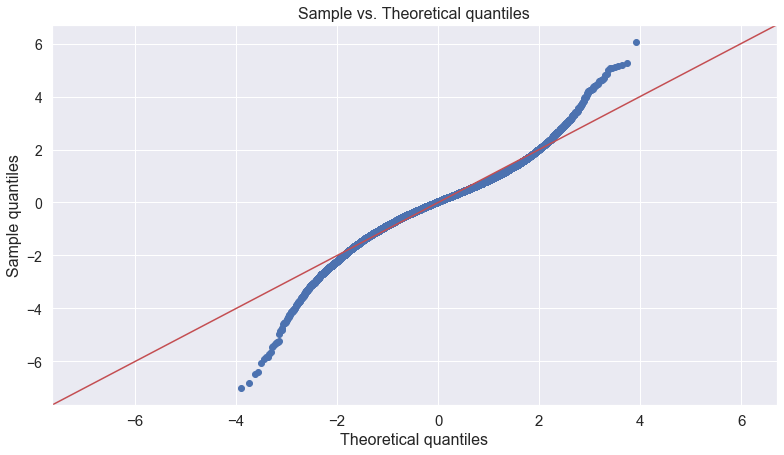

In [76]:
fig, ax = plt.subplots(figsize=(13, 7))
sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True, ax=ax)
plt.xlabel('Theoretical quantiles', fontsize=16)
plt.ylabel('Sample quantiles', fontsize=16)
plt.title('Sample vs. Theoretical quantiles', fontsize=16)
plt.xticks(fontsize=15);
plt.yticks(fontsize=14);
plt.show();

#### Infering the Q-Q plot
There is a small change in the new model. It means the residuals does not have a perfect normal distribution. But the residuals are not very far from the theoretical values.

### Checking for Homoscedasticity

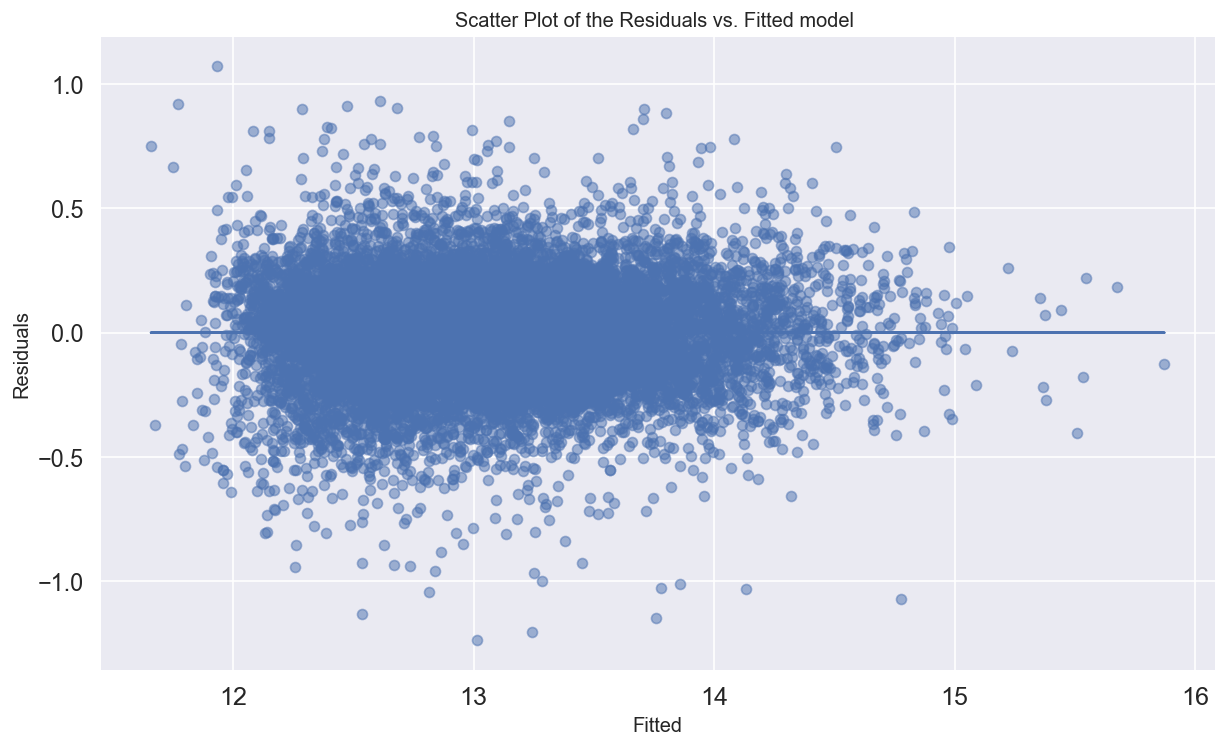

In [77]:
plt.figure(figsize=(12, 7), dpi= 120,  edgecolor='k');
plt.scatter(model.predict(df_feats[x_cols]), model.resid, alpha=0.5);
plt.plot(model.predict(df_feats[x_cols]), [0 for i in range(len(df_feats))]);
plt.gca().set(xlabel='Fitted', ylabel='Residuals',title='Scatter Plot of the Residuals vs. Fitted model ')
plt.xticks(fontsize=15); plt.yticks(fontsize=14);
plt.show();

The distribution of residuals did not change a lot after the refinement.

### Checking for Multicollinearity

In [78]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_living', 23.02105411667179),
 ('sqft_living15', 3.2111021757137492),
 ('zipcode_98004', 1.2163180934716373),
 ('zipcode_98023', 1.2661345662028587),
 ('view_4_0', 1.6159237792188),
 ('grade_7', 86.81254166514105),
 ('grade_6', 21.566530139567014),
 ('grade_8', 56.2525139639091),
 ('grade_5', 3.403796622812948),
 ('grade_9', 24.119243016029483),
 ('zipcode_98003', 1.1478602040232575),
 ('zipcode_98092', 1.1917738598465468),
 ('zipcode_98058', 1.2376924062268793),
 ('zipcode_98038', 1.329290798759254),
 ('zipcode_98002', 1.119730799296739),
 ('zipcode_98032', 1.0693664830766199),
 ('bathrooms', 3.2242794616918933),
 ('zipcode_98039', 1.0524755290988106),
 ('zipcode_98040', 1.2215644743285436),
 ('zipcode_98033', 1.2402826667503568),
 ('zipcode_98112', 1.2120150679837307),
 ('zipcode_98115', 1.3804655456972432),
 ('zipcode_98103', 1.4929633857953835),
 ('zipcode_98117', 1.3788872745252991),
 ('zipcode_98199', 1.2366834246012104),
 ('zipcode_98105', 1.1712745613492532),
 ('zipcode_

#### Inference from the  VIF values
VIF values are not too high like the first model. Stepwise selection decreased the values.

### K-fold Cross Validation for Refinement

In [79]:
linreg = LinearRegression()
cvs_10=cross_val_score(linreg, X, y, cv=10)
cvs_10_res_mean = round(np.mean(cvs_10),5)
cv_10_res_std = round(np.std(cvs_10),5)
print(f'Mean cross validation score for 10 fold is {cvs_10_res_mean}')
print(f'Standard deviation of the score is {cv_10_res_std}')


Mean cross validation score for 10 fold is 0.8845
Standard deviation of the score is 0.00319


The code above gives the mean values of the results after 10 tests with different train and test splits.

### Note

First I decided not to use the date column to predict the price of a house. After I finished all the project I tried adding the month which the house was sold to see if it makes the model better. And it worked! R-squared value increased and standard deviation decreased.

These are the 10-fold Cross Validation results before I added the sale month by one hot encoding:

Mean cross validation score for 10 fold is 0.88227 and standard deviation of the score is 0.00346

Difference in the R quared values of both models: 0.88453 - 0.88227 = 0.00226

Difference in the standard deviation of both models: 0.00346 - 0.00309 = 0.00037


There is a small difference between two models but I think it worths to add date to the parameters.


# iNterpreting the data


## Answers to the Questions 

### 1) Key factors to predict the price of a house: 

The key factors affecting the price of a house are square feet of living and location. This can be seen from the pairplot above and boxplot below. In fact there are many factors to predict the price of a house. In King county housing data set we are given 17 factors to predict the price. Home buying or selling is too complicated that only 17 parameters won't give you the price of the house. Our models success is 88.453% which means we have information about the main factors to predict the price but we don't have the details. 

The factors in the last model are square footages(basement, lot and living area of the house and living and lot area of the neighbors), bedrooms, bathrooms, construction quality, renovations, view of the house, location of the house and the month house was sold.

We can have more success if we have information about the following:

Some details about grade and condition columns(Roof, AC, kitchen and bathrooms) 

The size and the condition of the garden (Every big tree adds 10K to the value)

Deck and/or patio

Energy efficiency of the house

There are some factors which we can not control. These are economic indicators and interest rates and the local market. 

We were given 20 parameters but to make a succussful prediction we need approximayetely 5 parameters about each parameter. For example, we know only the square feet of basement but we need general condition of the basement, Quality of basement finished area,Unfinished square feet of basement area, Walkout or garden level basement walls.

Predicting the price of a house requires approximetely 100 parameters.

### 2) The most important factor determining the value of a house
   

Location! Location! Location!

In the beginning I did not plan to use all zipcode columns because I thought adding 70 more columns to 40 columns would increase the R-squared value but decrease the adjusted-R-squared value. But I realised that sample size was too big. According to the mathematical formula more than 100 columns was not going to be a problem for adjusted-R-squared. After adding zip codes as dummy variables the pridictive power of my model increased a lot. I understood that the most importing prediction factor for the price of a house is location. I wanted to go further to see why some regions are more expensive.

In [80]:
income_df=pd.read_csv('king_county_dataset_cleaned.csv')

In [81]:
from uszipcode import SearchEngine, Zipcode

In [82]:
search = SearchEngine(simple_zipcode=False)

In [83]:
def zco(x):
    '''
    Takes the given zip code parameter and returns the median house income of this area.
    
    '''
    income = search.by_zipcode(x)
    
    return income.median_household_income if income else x
   

In [84]:
income_df['income'] = income_df['zipcode'].astype(int).astype(str).apply(zco)

In [85]:
income_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,income
0,221900.0,3,-1.451039,-0.980629,-0.228177,1.0,0.0,0.0,3,7,-0.735234,-0.649622,-0.544665,-0.188877,98178,47.5112,-122.257,-0.943654,-0.260621,58707
1,538000.0,3,0.174482,0.533357,-0.189735,2.0,0.0,0.0,3,7,0.460766,0.259841,-0.680835,5.280340,98125,47.7210,-122.319,-0.432877,-0.187695,53044
2,180000.0,2,-1.451039,-1.427201,-0.123137,1.0,0.0,0.0,3,6,-1.230546,-0.649622,-1.293596,-0.188877,98028,47.7379,-122.233,1.070267,-0.172186,82448
3,604000.0,4,1.149794,-0.131054,-0.243873,1.0,0.0,0.0,5,7,-0.892284,1.419407,-0.204243,-0.188877,98136,47.5208,-122.393,-0.914467,-0.284453,84344
4,510000.0,3,-0.150622,-0.436030,-0.169499,1.0,0.0,0.0,3,8,-0.131194,-0.649622,0.544688,-0.188877,98074,47.6168,-122.045,-0.272347,-0.192682,143686


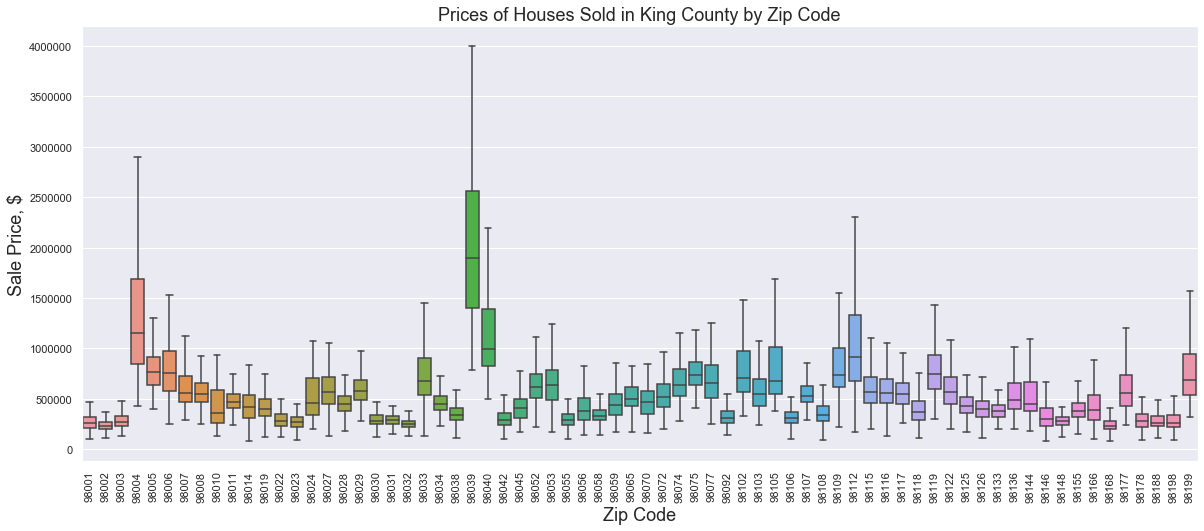

In [86]:
fig = plt.figure(figsize = (20,8));
fig = sns.boxplot(x='zipcode', y='price', data=income_df, showfliers = False);
plt.title('Prices of Houses Sold in King County by Zip Code',fontsize=18);
plt.xlabel("Zip Code", fontsize=18);
plt.xticks(rotation=90);
plt.ylabel('Sale Price, $', fontsize=18);
plt.show();


https://www.zillow.com/bellevue-wa-98004/

https://www.zillow.com/mercer-island-wa-98040/

https://www.zillow.com/medina-wa-98039/

https://www.zillow.com/seattle-wa-98112/

In [87]:
high_price_zipcodes=[98040,98004,98039,98112]
for i in high_price_zipcodes:
    zipcode = search.by_zipcode(i)
    income=zipcode.median_household_income
    density=zipcode.population_density
    
    print('Zip code:',i ,'-------   Median household income of all the houses in this zipcode:' ,income)

Zip code: 98040 -------   Median household income of all the houses in this zipcode: 126359
Zip code: 98004 -------   Median household income of all the houses in this zipcode: 93521
Zip code: 98039 -------   Median household income of all the houses in this zipcode: 183833
Zip code: 98112 -------   Median household income of all the houses in this zipcode: 96054


In [88]:
zipcode = search.by_zipcode(78240)
race=zipcode.population_by_race
race

[{'key': 'Data',
  'values': [{'x': 'White', 'y': 36464},
   {'x': 'Black Or African American', 'y': 3513},
   {'x': 'American Indian Or Alaskan Native', 'y': 371},
   {'x': 'Asian', 'y': 4261},
   {'x': 'Native Hawaiian & Other Pacific Islander', 'y': 56},
   {'x': 'Other Race', 'y': 4467},
   {'x': 'Two Or More Races', 'y': 1979}]}]

In [89]:
zipcode = search.by_zipcode(78240)
zipcode

Zipcode(zipcode_type='Standard', major_city='San Antonio', post_office_city='San Antonio, TX', common_city_list=['San Antonio'], county='Bexar County', state='TX', lat=29.52, lng=-98.61, timezone='Central', radius_in_miles=3.0, area_code_list=['210'], population=51111, population_density=4517.0, land_area_in_sqmi=11.32, water_area_in_sqmi=0.01, housing_units=25099, occupied_housing_units=22815, median_home_value=141300, median_household_income=48281, bounds_west=-98.651982, bounds_east=-98.560769, bounds_north=29.549924, bounds_south=29.487055, zipcode='78240', polygon=[[-98.611763, 29.499651], [-98.612472, 29.500171], [-98.61298, 29.500551], [-98.6137, 29.501087], [-98.614074, 29.501369], [-98.614617, 29.501778], [-98.615176, 29.502199], [-98.615351, 29.502328], [-98.615919, 29.502748], [-98.616651, 29.5033], [-98.616785, 29.503401], [-98.617375, 29.503851], [-98.618663, 29.504836], [-98.619076, 29.504416], [-98.619756, 29.503702], [-98.620383, 29.503048], [-98.621005, 29.502413], [-9

### 3) Home improvements

Columns in the data set:

date - Date house was sold

price - Price is prediction target

bedrooms - Number of Bedrooms/House

bathrooms - Number of bathrooms/bedrooms

sqft_living - Square footage of the home

sqft_lot - Square footage of the lot

floors - Total floors (levels) in house

waterfront - House which has a view to a waterfront

view - If the house has a view or not

condition - How good the condition is ( Overall )

grade - overall grade given to the housing unit, based on King County grading system

sqft_above - square footage of house apart from basement

sqft_basement - square footage of the basement

yr_built - Built Year

yr_renovated - Year when house was renovated

zipcode - zipcode of the house

lat - Latitude coordinate

long - Longitude coordinate

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


Some of these columns can not be changed after you buy a house. For example you can not change the location. Columns dependent of the location are: Latitude, Longitude,Zip code, The square footage of interior housing living space for the nearest 15 neighbors, The square footage of the land lots of the nearest 15 neighbors etc. You can not change total floors (levels) in house. 

View and waterfront also can not be changed but some improvements can be made to them. For example, a deck can be made to have a better view. A pool can be made to have a waterfront like view.

There are some columns in the dataset that we can change.Bedrooms, bathrooms,year renovated,date the house was sold  We can have more bedrooms by renovating an attic, we can have a half bathroom by converting a closet into a bathroom, you can change the finished area of the basement. Replacing the entry door or garage door, minor kitchen remodeling, adding a wooden deck, upscale siding replacement also return the money you invest for renovations.



In [90]:
income_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'income'],
      dtype='object')